## ReLU activation

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from autils import plt_act_trio
from lab_utils_relu import *
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

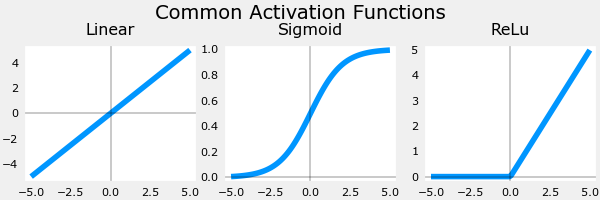

In [9]:
plt_act_trio()

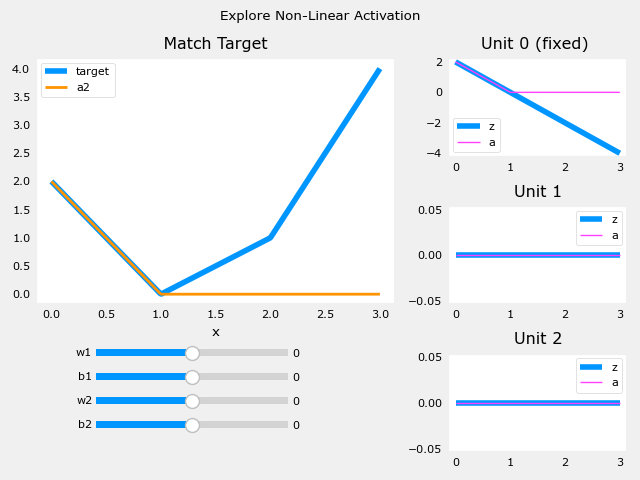

In [10]:
_ = plt_relu_ex()

## Softmax

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs
%matplotlib widget
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from lab_utils_softmax import plt_softmax
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [ ]:
def my_softmax(z):
    ez = np.exp(z)
    sm = ez/np.sum(ez)
    return(sm)

In [ ]:
plt.close("all")
plt_softmax(my_softmax)

In [ ]:
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0, random_state=30)

In [ ]:
model = Sequential(
    [
        Dense(25, activation='relu'),
        Dense(15, activation='relu'),
        Dense(4, activation='softmax')
    ]
)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X_train, y_train,
    epochs=10
)

In [ ]:
p_nonpreferred = model.predict(X_train)
print(p_nonpreferred [:2])
print("largest value", np.max(p_nonpreferred), "smallest value", np.min(p_nonpreferred))

In [ ]:
preferred_model = Sequential(
    [
        Dense(25, activation='relu'),
        Dense(15, activation='relu'),
        Dense(4, activation='linear')
    ]
)

preferred_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

preferred_model.fit(
    X_train, y_train,
    epochs=10
)

In [ ]:
# The output is a range
p_preferred = preferred_model.predict(X_train)
print(f"two example output vectors: \n {p_preferred [:2]}")
print("largest value", np.max(p_preferred), "smallest value", np.min(p_preferred))

In [ ]:
# The output is a probabilities
sm_preferred = tf.nn.softmax(p_preferred).numpy()
print(f"two example output vectors: \n {sm_preferred [:2]}")
print("largest value", np.max(sm_preferred), "smallest value", np.min(sm_preferred))

In [ ]:
for i in range(5):
    print(f"{p_preferred[i]}, category: {np.argmax(p_preferred[i])}")

## Multi-class Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.set_printoptions(precision=2)
from lab_utils_multiclass_TF import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [2]:
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std, random_state=30)

c:\Users\LOQ\Sinau\Week 2\lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


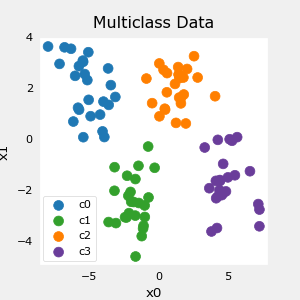

In [3]:
plt_mc(X_train, y_train, classes, centers, std=std)

In [4]:
# show classes in data set
print(f"unique classes {np.unique(y_train)}")
# show how classes are represented
print(f"class representation {y_train[:10]}")
# show shapes of our dataset
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")

unique classes [0 1 2 3]
class representation [3 3 3 0 3 3 3 3 2 0]
shape of X_train: (100, 2), shape of y_train: (100,)


In [5]:
tf.random.set_seed(1234)
model = Sequential(
    [
        Dense(2, activation='relu', name='L1'),
        Dense(4, activation='linear', name='L2')
    ]
)

In [6]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01)
)

model.fit(
    X_train, y_train,
    epochs=200
)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0846
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - loss: 1.9042
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7638 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 1.6535  
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5688 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5080 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 1.4644  
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4287 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 1.3938  
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3603 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3281 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2953 
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2613 
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2258 
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1897 
Epoch 16/200
4/4 ━━

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step


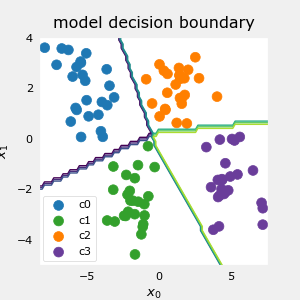

In [7]:
plt_cat_mc(X_train, y_train, model, classes)

In [ ]:
# gather the trained parameters from the first layer
l1 = model.get_layer('L1')
W1, b1 = l1.get_weights()

In [ ]:
# plot the function of the first layer
plt_layer_relu(X_train, y_train.reshape(-1,), W1, b1, classes)

In [ ]:
# gather the trained parameters from the output layer
l2 = model.get_layer('L2')
W2, b2 = l2.get_weights()
# create the 'new features', the training examples after L1 transformation
Xl2 = np.maximum(0, np.dot(X_train, W1) + b1)

plt_output_layer_linear(Xl2, y_train.reshape(-1,), W2, b2, classes,
                        x0_rng = (-0.25, np.amax(Xl2[:,0])), x1_rng=(-0.25,np.amax(Xl2[:,1])))

## Derivative

In [3]:
from sympy import symbols, diff

In [4]:
J = (3)**2
J_epsilon = (3 + 0.001)**2
k = (J_epsilon - J)/0.001
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_dw ~= k = {k:0.6f}") 

J = 9, J_epsilon = 9.006001, dJ_dw ~= k = 6.001000


In [5]:
J = (3)**2
J_epsilon = (3 + 0.000000001)**2
k = (J_epsilon - J)/0.000000001
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_dw ~= k = {k}")

J = 9, J_epsilon = 9.000000006, dJ_dw ~= k = 6.000000496442226


In [6]:
J, w = symbols('J, w')

In [7]:
J = w**2
J

w**2

In [8]:
dJ_dw = diff(J,w)
dJ_dw

2*w

In [11]:
dJ_dw.subs([(w,2)])

4

In [12]:

dJ_dw.subs([(w,3)])

6

In [13]:
dJ_dw.subs([(w, -3)])

-6

In [14]:
w, J = symbols('w, J')

In [15]:
J = 2 * w
J

2*w

In [17]:
dJ_dw = diff(J,w)
dJ_dw

2

In [18]:
dJ_dw.subs([(w, -3)])

2

In [19]:
J = 2*3
J_epsilon = 2*(3 + 0.001)
k = (J_epsilon - J)/0.001
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_dw ~= k = {k}")

J = 6, J_epsilon = 6.002, dJ_dw ~= k = 1.9999999999997797


In [20]:
J, w = symbols('J, w')

In [21]:
J = w**3
J

w**3

In [22]:
dJ_dw = diff(J, w)
dJ_dw

3*w**2

In [23]:
dJ_dw.subs([(w,2)])

12

In [24]:
J = (2)**3
J_epsilon - (2+0.001)**3
k = (J_epsilon - J)/0.001
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_dw ~= k = {k}")

J = 8, J_epsilon = 6.002, dJ_dw ~= k = -1998.0000000000002


In [25]:
J, w = symbols('J, w')

In [26]:
J = 1/w
J

1/w

In [27]:
dJ_dw = diff(J,w)
dJ_dw

-1/w**2

In [28]:
dJ_dw.subs([(w,2)])

-1/4

In [29]:
J = 1/2
J_epsilon = 1/(2+0.001)
k = (J_epsilon - J)/0.001
print(f"J = {J}, J_epsilon = {J_epsilon}, dJ_dw ~= k = {k}")

J = 0.5, J_epsilon = 0.49975012493753124, dJ_dw ~= k = -0.2498750624687629


In [30]:
J, w = symbols('J, w')